In [107]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [208]:
data1=pd.read_csv('churn_data.csv')
data2=pd.read_csv('customer_data.csv')
data3=pd.read_csv('internet_data.csv')

In [209]:
data=pd.merge(data1,data2, on = "customerID", how = "inner") 
data.head(2)

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,Female,0,Yes,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No,Male,0,No,No


In [210]:
data=pd.merge(data,data3, on = "customerID", how = "inner") 
data.head(2)

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,...,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,Female,...,Yes,No,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No,Male,...,No,No,No,DSL,Yes,No,Yes,No,No,No


In [199]:
data.columns

Index(['customerID', 'tenure', 'PhoneService', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn', 'gender',
       'SeniorCitizen', 'Partner', 'Dependents', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies'],
      dtype='object')

In [211]:
data.shape

(7043, 21)

In [201]:
data.describe()

,tenure,MonthlyCharges,SeniorCitizen
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,0.162147
std,24.559481,30.090047,0.368612
min,0.000000,18.250000,0.000000
25%,9.000000,35.500000,0.000000
50%,29.000000,70.350000,0.000000
75%,55.000000,89.850000,0.000000
max,72.000000,118.750000,1.000000


In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   tenure            7043 non-null   int64  
 2   PhoneService      7043 non-null   object 
 3   Contract          7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
 8   Churn             7043 non-null   object 
 9   gender            7043 non-null   object 
 10  SeniorCitizen     7043 non-null   int64  
 11  Partner           7043 non-null   object 
 12  Dependents        7043 non-null   object 
 13  MultipleLines     7043 non-null   object 
 14  InternetService   7043 non-null   object 
 15  OnlineSecurity    7043 non-null   object 
 16  OnlineBackup      7043 non-null   object 


In [202]:
data.head(2)

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,...,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,Female,...,Yes,No,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No,Male,...,No,No,No,DSL,Yes,No,Yes,No,No,No


In [212]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
cols = ['PhoneService', 'PaperlessBilling', 'Churn','Partner','Dependents']
data[cols]= data[cols].apply(labelencoder.fit_transform)
data.head(1)

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,...,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,1,0,Month-to-month,1,Electronic check,29.85,29.85,0,Female,...,1,0,No phone service,DSL,No,Yes,No,No,No,No


In [213]:
data['gender'] = pd.get_dummies(data['gender'], drop_first=True)
data.head(2)

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,...,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,1,0,Month-to-month,1,Electronic check,29.85,29.85,0,0,...,1,0,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,34,1,One year,0,Mailed check,56.95,1889.5,0,1,...,0,0,No,DSL,Yes,No,Yes,No,No,No


In [214]:
data = pd.get_dummies(data,columns=['Contract', 'PaymentMethod', 'InternetService'], drop_first=True)
data.head(2)
data.shape

(7043, 25)

In [154]:
ml = pd.get_dummies(data['MultipleLines'], prefix='MultipleLines')
ml1 = ml.drop(['MultipleLines_No phone service'], 1)
data = pd.concat([data,ml1], axis=1)
os = pd.get_dummies(data['OnlineSecurity'], prefix='OnlineSecurity')
os1 = os.drop(['OnlineSecurity_No internet service'], 1)
data = pd.concat([data,os1], axis=1)
ob = pd.get_dummies(data['OnlineBackup'], prefix='OnlineBackup')
ob1 = ob.drop(['OnlineBackup_No internet service'], 1)
data = pd.concat([data,ob1], axis=1)
dp = pd.get_dummies(data['DeviceProtection'], prefix='DeviceProtection')
dp1 = dp.drop(['DeviceProtection_No internet service'], 1)
data = pd.concat([data,dp1], axis=1)
ts = pd.get_dummies(data['TechSupport'], prefix='TechSupport')
ts1 = ts.drop(['TechSupport_No internet service'], 1)
data = pd.concat([data,ts1], axis=1)
st =pd.get_dummies(data['StreamingTV'], prefix='StreamingTV')
st1 = st.drop(['StreamingTV_No internet service'], 1)
data = pd.concat([data,st1], axis=1)
ssm = pd.get_dummies(data['StreamingMovies'], prefix='StreamingMovies')
ssm1 = ssm.drop(['StreamingMovies_No internet service'], 1)
data = pd.concat([data,ssm1], axis=1)

In [215]:
data = pd.get_dummies(data,columns=['MultipleLines', 'OnlineSecurity','OnlineBackup','DeviceProtection',
                                   'TechSupport','StreamingTV','StreamingMovies'], drop_first=True)
data.head(2)
data.shape

(7043, 32)

In [216]:
data.isnull().sum()

customerID                               0
tenure                                   0
PhoneService                             0
PaperlessBilling                         0
MonthlyCharges                           0
TotalCharges                             0
Churn                                    0
gender                                   0
SeniorCitizen                            0
Partner                                  0
Dependents                               0
Contract_One year                        0
Contract_Two year                        0
PaymentMethod_Credit card (automatic)    0
PaymentMethod_Electronic check           0
PaymentMethod_Mailed check               0
InternetService_Fiber optic              0
InternetService_No                       0
MultipleLines_No phone service           0
MultipleLines_Yes                        0
OnlineSecurity_No internet service       0
OnlineSecurity_Yes                       0
OnlineBackup_No internet service         0
OnlineBacku

In [156]:
data.shape

(7043, 42)

In [157]:
data = data.drop(['Contract','PaymentMethod','gender','MultipleLines','InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies'], 1)


In [219]:
data['TotalCharges'] = pd.to_numeric(data["TotalCharges"].replace(" ",""),downcast="float")

In [220]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 32 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   customerID                             7043 non-null   object 
 1   tenure                                 7043 non-null   int64  
 2   PhoneService                           7043 non-null   int32  
 3   PaperlessBilling                       7043 non-null   int32  
 4   MonthlyCharges                         7043 non-null   float64
 5   TotalCharges                           7032 non-null   float32
 6   Churn                                  7043 non-null   int32  
 7   gender                                 7043 non-null   uint8  
 8   SeniorCitizen                          7043 non-null   int64  
 9   Partner                                7043 non-null   int32  
 10  Dependents                             7043 non-null   int32  
 11  Cont

In [161]:
data.head(1)

,customerID,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,SeniorCitizen,Partner,Dependents,...,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes
0,7590-VHVEG,1,0,1,29.85,29.85,0,0,1,0,...,0,1,1,0,1,0,1,0,1,0


In [221]:
data.dtypes

customerID                                object
tenure                                     int64
PhoneService                               int32
PaperlessBilling                           int32
MonthlyCharges                           float64
TotalCharges                             float32
Churn                                      int32
gender                                     uint8
SeniorCitizen                              int64
Partner                                    int32
Dependents                                 int32
Contract_One year                          uint8
Contract_Two year                          uint8
PaymentMethod_Credit card (automatic)      uint8
PaymentMethod_Electronic check             uint8
PaymentMethod_Mailed check                 uint8
InternetService_Fiber optic                uint8
InternetService_No                         uint8
MultipleLines_No phone service             uint8
MultipleLines_Yes                          uint8
OnlineSecurity_No in

Text(0.5, 1.0, 'TotalCharges')

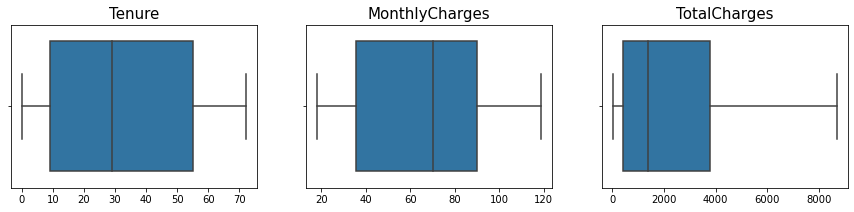

In [222]:
plt.figure(figsize=(15,3))
plt.subplot(1,3,1)
sns.boxplot(data[["tenure"]])
plt.title("Tenure",size=15)

plt.subplot(1,3,2)
sns.boxplot(data[["MonthlyCharges"]])
plt.title("MonthlyCharges",size=15)

plt.subplot(1,3,3)
sns.boxplot(data[["TotalCharges"]])
plt.title("TotalCharges",size=15)

In [223]:
data.isnull().sum()

customerID                                0
tenure                                    0
PhoneService                              0
PaperlessBilling                          0
MonthlyCharges                            0
TotalCharges                             11
Churn                                     0
gender                                    0
SeniorCitizen                             0
Partner                                   0
Dependents                                0
Contract_One year                         0
Contract_Two year                         0
PaymentMethod_Credit card (automatic)     0
PaymentMethod_Electronic check            0
PaymentMethod_Mailed check                0
InternetService_Fiber optic               0
InternetService_No                        0
MultipleLines_No phone service            0
MultipleLines_Yes                         0
OnlineSecurity_No internet service        0
OnlineSecurity_Yes                        0
OnlineBackup_No internet service

In [224]:
data = data[~np.isnan(data['TotalCharges'])]

In [226]:
data.isnull().sum()

customerID                               0
tenure                                   0
PhoneService                             0
PaperlessBilling                         0
MonthlyCharges                           0
TotalCharges                             0
Churn                                    0
gender                                   0
SeniorCitizen                            0
Partner                                  0
Dependents                               0
Contract_One year                        0
Contract_Two year                        0
PaymentMethod_Credit card (automatic)    0
PaymentMethod_Electronic check           0
PaymentMethod_Mailed check               0
InternetService_Fiber optic              0
InternetService_No                       0
MultipleLines_No phone service           0
MultipleLines_Yes                        0
OnlineSecurity_No internet service       0
OnlineSecurity_Yes                       0
OnlineBackup_No internet service         0
OnlineBacku

In [227]:
data.corr()

,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,gender,SeniorCitizen,Partner,Dependents,...,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes
tenure,1.000000,0.007877,0.004823,0.246862,0.825880,-0.354049,0.005285,0.015683,0.381912,0.163386,...,-0.037529,0.361138,-0.037529,0.361520,-0.037529,0.325288,-0.037529,0.280264,-0.037529,0.285402
PhoneService,0.007877,1.000000,0.016696,0.248033,0.113008,0.011691,-0.007515,0.008392,0.018397,-0.001078,...,0.171817,-0.052133,0.171817,-0.070076,0.171817,-0.095138,0.171817,-0.021383,0.171817,-0.033477
PaperlessBilling,0.004823,0.016696,1.000000,0.351930,0.157830,0.191454,-0.011902,0.156258,-0.013957,-0.110131,...,-0.320592,0.127056,-0.320592,0.104079,-0.320592,0.037536,-0.320592,0.224241,-0.320592,0.211583
MonthlyCharges,0.246862,0.248033,0.351930,1.000000,0.651065,0.192858,-0.013779,0.219874,0.097825,-0.112343,...,-0.763191,0.441529,-0.763191,0.482607,-0.763191,0.338301,-0.763191,0.629668,-0.763191,0.627235
TotalCharges,0.825880,0.113008,0.157830,0.651065,1.000000,-0.199484,0.000048,0.102411,0.319072,0.064653,...,-0.374878,0.510100,-0.374878,0.522881,-0.374878,0.432868,-0.374878,0.515709,-0.374878,0.519867
Churn,-0.354049,0.011691,0.191454,0.192858,-0.199484,1.000000,-0.008545,0.150541,-0.149982,-0.163128,...,-0.227578,-0.082307,-0.227578,-0.066193,-0.227578,-0.164716,-0.227578,0.063254,-0.227578,0.060860
gender,0.005285,-0.007515,-0.011902,-0.013779,0.000048,-0.008545,1.000000,-0.001819,-0.001379,0.010349,...,0.004745,-0.013093,0.004745,-0.000807,0.004745,-0.008507,0.004745,-0.007124,0.004745,-0.010105
SeniorCitizen,0.015683,0.008392,0.156258,0.219874,0.102411,0.150541,-0.001819,1.000000,0.016957,-0.210550,...,-0.182519,0.066663,-0.182519,0.059514,-0.182519,-0.060577,-0.182519,0.105445,-0.182519,0.119842
Partner,0.381912,0.018397,-0.013957,0.097825,0.319072,-0.149982,-0.001379,0.016957,1.000000,0.452269,...,-0.000286,0.141849,-0.000286,0.153556,-0.000286,0.120206,-0.000286,0.124483,-0.000286,0.118108
Dependents,0.163386,-0.001078,-0.110131,-0.112343,0.064653,-0.163128,0.010349,-0.210550,0.452269,1.000000,...,0.138383,0.023639,0.138383,0.013900,0.138383,0.063053,0.138383,-0.016499,0.138383,-0.038375


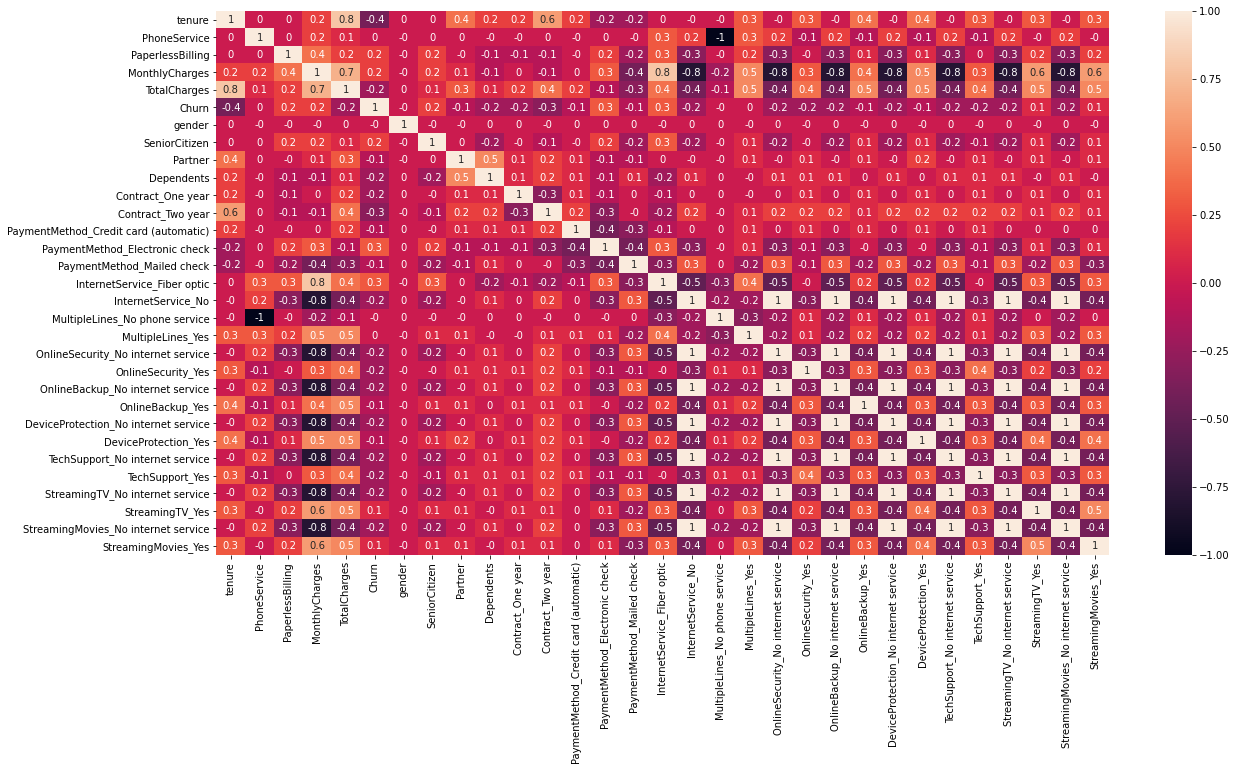

In [228]:
plt.figure(figsize = (20,10))
sns.heatmap(round(data.corr(),1),annot = True)
plt.show()

In [230]:
x = data.drop(['Churn','customerID'], axis=1)
y=data['Churn']

In [231]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)
print('x_train:',x_train.shape)
print('x_test:',x_test.shape)
print('y_train:',y_train.shape)
print('y_test:',y_test.shape)

x_train: (4922, 30)
x_test: (2110, 30)
y_train: (4922,)
y_test: (2110,)


In [232]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(x_train[['tenure','MonthlyCharges','TotalCharges']])
x_train[['tenure','MonthlyCharges','TotalCharges']] = sc.transform(x_train[['tenure','MonthlyCharges','TotalCharges']])
x_train.head()

,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,gender,SeniorCitizen,Partner,Dependents,Contract_One year,...,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes
1584,1.330585,0,1,-0.383857,0.534804,0,1,0,0,0,...,0,1,0,1,0,0,0,1,0,1
1043,-0.013956,1,1,0.155250,0.022199,1,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1077,0.352737,1,1,1.639866,0.977112,0,0,0,0,0,...,0,1,0,1,0,1,0,1,0,1
2478,-1.154780,1,0,-0.680780,-0.909757,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6908,-0.951061,1,0,-0.322482,-0.809427,1,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


In [233]:
p = (sum(y_train)/len(y_train))
print(f"p: {p}")

k = x_train.shape[1]
print(f"k: {k}")

N = 10 * k / p
print(f"N: {int(N)}")

p: 0.2669646485168631
k: 30
N: 1123


In [234]:
import statsmodels.api as sm
logmodel = sm.GLM(y_train,(sm.add_constant(x_train)), family = sm.families.Binomial())
logmodel.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4898
Model Family:                Binomial   Df Model:                           23
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2037.6
Date:                Mon, 08 Mar 2021   Deviance:                       4075.2
Time:                        12:13:21   Pearson chi2:                 5.56e+03
No. Iterations:                     9                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -2.1389      0.767     -2.789      0.005      -3.642      -0.636
tenure                                   -1.5982      0.187     -8.563      0.000      -1.964      -1.232
PhoneService                             -0.8140      0.089     -9.098      0.000      -0.989      -0.639
PaperlessBilling                          0.2621      0.089      2.954      0.003       0.088       0.436
MonthlyCharges                           -1.8498      1.144     -1.616      0.106      -4.093       0.393
TotalCharges                              0.8390      0.195      4.292      0.000       0.456       1.222
gender                                    0.0238      0.078      0.307      0.759      -0.128       0.176
SeniorCitizen                             0.2163      0.100      2.163      0.031       0.020       0.412
Partner                                  -0.0316      0.092     -0.342      0.732      -0.213       0.150
Dependents                               -0.0525      0.107     -0.492      0.623      -0.262       0.157
Contract_One year                        -0.7097      0.128     -5.545      0.000      -0.961      -0.459
Contract_Two year                        -1.5640      0.215     -7.270      0.000      -1.986      -1.142
PaymentMethod_Credit card (automatic)    -0.0060      0.136     -0.044      0.965      -0.273       0.261
PaymentMethod_Electronic check            0.2865      0.114      2.521      0.012       0.064       0.509
PaymentMethod_Mailed check               -0.1707      0.138     -1.238      0.216      -0.441       0.099
InternetService_Fiber optic               2.2106      0.954      2.318      0.020       0.341       4.080
InternetService_No                       -0.3218      0.138     -2.332      0.020      -0.592      -0.051
MultipleLines_No phone service           -1.3249      0.766     -1.729      0.084      -2.827       0.177
MultipleLines_Yes                         0.6621      0.211      3.136      0.002       0.248       1.076
OnlineSecurity_No internet service       -0.3218      0.138     -2.332      0.020      -0.592      -0.051
OnlineSecurity_Yes                       -0.0752      0.213     -0.353      0.724      -0.492       0.342
OnlineBackup_No internet service         -0.3218      0.138     -2.332      0.020      -0.592      -0.051
OnlineBackup_Yes                          0.1205      0.209      0.577      0.564      -0.289       0.530
DeviceProtection_No internet service     -0.3218      0.138     -2.332      0.020      -0.592      -0.051
DeviceProtection_Yes                      0.2071      0.212      0.978      0.328      -0.208       0.622
TechSupport_No internet service          -0.3218      0.138     -2.332      0.020      -0.592      -0.051
TechSuppo

In [235]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
logreg = LogisticRegression()
rfe = RFE(logreg, 15)
rfe = rfe.fit(x_train, y_train)

In [236]:
col = x_train.columns[rfe.support_]
col

Index(['tenure', 'MonthlyCharges', 'TotalCharges', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Electronic check',
       'InternetService_Fiber optic', 'MultipleLines_Yes',
       'OnlineSecurity_No internet service',
       'OnlineBackup_No internet service',
       'DeviceProtection_No internet service',
       'TechSupport_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes'],
      dtype='object')

In [237]:
x_train_sm = sm.add_constant(x_train[col])
logm2 = sm.GLM(y_train,x_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4910
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2050.5
Date:                Mon, 08 Mar 2021   Deviance:                       4100.9
Time:                        12:14:13   Pearson chi2:                 5.64e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                   -2.6145      0.160    -16.376      0.000      -2.927      -2.302
tenure                                  -1.5607      0.182     -8.578      0.000      -1.917      -1.204
MonthlyCharges                          -1.3176      0.182     -7.248      0.000      -1.674      -0.961
TotalCharges                             0.8167      0.193      4.237      0.000       0.439       1.194
Contract_One year                       -0.7713      0.126     -6.122      0.000      -1.018      -0.524
Contract_Two year                       -1.6934      0.211     -8.026      0.000      -2.107      -1.280
PaymentMethod_Electronic check           0.3893      0.082      4.742      0.000       0.228       0.550
InternetService_Fiber optic              1.9288      0.194      9.918      0.000       1.548       2.310
MultipleLines_Yes                        0.6278      0.101      6.200      0.000       0.429       0.826
OnlineSecurity_No internet service      -0.3616      0.041     -8.721      0.000      -0.443      -0.280
OnlineBackup_No internet service        -0.3616      0.041     -8.721      0.000      -0.443      -0.280
DeviceProtection_No internet service    -0.3616      0.041     -8.721      0.000      -0.443      -0.280
TechSupport_No internet service         -0.3616      0.041     -8.721      0.000      -0.443      -0.280
StreamingTV_Yes                          0.7082      0.113      6.272      0.000       0.487       0.929
StreamingMovies_No internet service     -0.3616      0.041     -8.721      0.000      -0.443      -0.280
StreamingMovies_Yes                      0.7393      0.112      6.622      0.000       0.520       0.958
========================================================================================================
"""

In [241]:
y_pred = res.predict(x_train_sm)
y_pred[:10]

1584    0.018083
1043    0.299365
1077    0.372015
2478    0.341154
6908    0.433211
3887    0.524668
3006    0.649075
4693    0.004691
6898    0.277898
1461    0.484531
dtype: float64

In [243]:
y_pred = y_pred.values.reshape(-1)

In [250]:
y_pred_final = pd.DataFrame({'Churn':y_train.values, 'Churn_Prob':y_pred})
y_pred_final['CustID'] = y_train.index
y_pred_final.head()

,Churn,Churn_Prob,CustID
0,0,0.018083,1584
1,1,0.299365,1043
2,1,0.372015,1077
3,0,0.341154,2478
4,1,0.433211,6908


In [251]:
y_pred_final['predicted'] = y_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_pred_final.head()

,Churn,Churn_Prob,CustID,predicted
0,0,0.018083,1584,0
1,1,0.299365,1043,0
2,1,0.372015,1077,0
3,0,0.341154,2478,0
4,1,0.433211,6908,0


In [258]:
from sklearn.metrics import accuracy_score
print("Accuracy (Training Set): ",round(accuracy_score(y_pred_final.Churn, y_pred_final.predicted),4))

Accuracy (Training Set):  0.805


In [276]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_pred_final.Churn, y_pred_final.predicted))

[[3241  367]
 [ 626  688]]


In [261]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = x_train[col].columns
vif['VIF'] = [variance_inflation_factor(x_train[col].values, i) for i in range(x_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,OnlineSecurity_No internet service,inf
9,OnlineBackup_No internet service,inf
10,DeviceProtection_No internet service,inf
11,TechSupport_No internet service,inf
13,StreamingMovies_No internet service,inf
1,MonthlyCharges,12.40
2,TotalCharges,10.17
0,tenure,6.75
6,InternetService_Fiber optic,4.73
12,StreamingTV_Yes,2.74


In [262]:
col = col.drop('MonthlyCharges',1)
col

Index(['tenure', 'TotalCharges', 'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Electronic check', 'InternetService_Fiber optic',
       'MultipleLines_Yes', 'OnlineSecurity_No internet service',
       'OnlineBackup_No internet service',
       'DeviceProtection_No internet service',
       'TechSupport_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes'],
      dtype='object')

In [263]:
vif = pd.DataFrame()
vif['Features'] = x_train[col].columns
vif['VIF'] = [variance_inflation_factor(x_train[col].values, i) for i in range(x_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,OnlineSecurity_No internet service,inf
8,OnlineBackup_No internet service,inf
9,DeviceProtection_No internet service,inf
10,TechSupport_No internet service,inf
12,StreamingMovies_No internet service,inf
1,TotalCharges,7.51
0,tenure,6.46
5,InternetService_Fiber optic,2.81
11,StreamingTV_Yes,2.60
13,StreamingMovies_Yes,2.56


In [264]:
# Let's re-run the model using the selected variables
x_train_sm = sm.add_constant(x_train[col])
logm3 = sm.GLM(y_train,x_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4911
Model Family:                Binomial   Df Model:                           10
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2077.4
Date:                Mon, 08 Mar 2021   Deviance:                       4154.8
Time:                        12:44:58   Pearson chi2:                 5.20e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                   -1.7985      0.106    -16.943      0.000      -2.007      -1.590
tenure                                  -1.2413      0.175     -7.091      0.000      -1.584      -0.898
TotalCharges                             0.3740      0.182      2.057      0.040       0.018       0.730
Contract_One year                       -0.8539      0.125     -6.847      0.000      -1.098      -0.609
Contract_Two year                       -1.8081      0.210     -8.622      0.000      -2.219      -1.397
PaymentMethod_Electronic check           0.4412      0.081      5.430      0.000       0.282       0.600
InternetService_Fiber optic              0.7604      0.103      7.369      0.000       0.558       0.963
MultipleLines_Yes                        0.3479      0.092      3.786      0.000       0.168       0.528
OnlineSecurity_No internet service      -0.1477      0.029     -5.009      0.000      -0.205      -0.090
OnlineBackup_No internet service        -0.1477      0.029     -5.009      0.000      -0.205      -0.090
DeviceProtection_No internet service    -0.1477      0.029     -5.009      0.000      -0.205      -0.090
TechSupport_No internet service         -0.1477      0.029     -5.009      0.000      -0.205      -0.090
StreamingTV_Yes                          0.2811      0.095      2.948      0.003       0.094       0.468
StreamingMovies_No internet service     -0.1477      0.029     -5.009      0.000      -0.205      -0.090
StreamingMovies_Yes                      0.3347      0.095      3.506      0.000       0.148       0.522
========================================================================================================
"""

In [267]:
y_train_pred = res.predict(x_train_sm).values.reshape(-1)
y_pred_final['Churn_Prob'] = y_train_pred
y_pred[:10] 

array([0.01808252, 0.29936525, 0.37201526, 0.34115359, 0.43321101,
       0.52466805, 0.64907466, 0.00469146, 0.27789757, 0.48453091])

In [268]:
y_pred_final['predicted'] = y_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_pred_final.head()

,Churn,Churn_Prob,CustID,predicted
0,0,0.011630,1584,0
1,1,0.266483,1043,0
2,1,0.463356,1077,0
3,0,0.330642,2478,0
4,1,0.450579,6908,0


In [271]:
print("Accuracy: ",round(accuracy_score(y_pred_final.Churn, y_pred_final.predicted),4))

Accuracy:  0.7983


In [274]:
vif = pd.DataFrame()
vif['Features'] = x_train[col].columns
vif['VIF'] = [variance_inflation_factor(x_train[col].values, i) for i in range(x_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,OnlineSecurity_No internet service,inf
8,OnlineBackup_No internet service,inf
9,DeviceProtection_No internet service,inf
10,TechSupport_No internet service,inf
12,StreamingMovies_No internet service,inf
1,TotalCharges,7.51
0,tenure,6.46
5,InternetService_Fiber optic,2.81
11,StreamingTV_Yes,2.60
13,StreamingMovies_Yes,2.56


In [277]:
col = col.drop('MultipleLines_Yes',1)
col

Index(['tenure', 'TotalCharges', 'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Electronic check', 'InternetService_Fiber optic',
       'OnlineSecurity_No internet service',
       'OnlineBackup_No internet service',
       'DeviceProtection_No internet service',
       'TechSupport_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes'],
      dtype='object')

In [278]:
x_train_sm = sm.add_constant(x_train[col])
logm4 = sm.GLM(y_train,x_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4912
Model Family:                Binomial   Df Model:                            9
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2084.6
Date:                Mon, 08 Mar 2021   Deviance:                       4169.2
Time:                        14:16:49   Pearson chi2:                 5.27e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                   -1.6746      0.100    -16.711      0.000      -1.871      -1.478
tenure                                  -1.2607      0.174     -7.230      0.000      -1.602      -0.919
TotalCharges                             0.4746      0.179      2.647      0.008       0.123       0.826
Contract_One year                       -0.8818      0.124     -7.085      0.000      -1.126      -0.638
Contract_Two year                       -1.8471      0.210     -8.803      0.000      -2.258      -1.436
PaymentMethod_Electronic check           0.4480      0.081      5.530      0.000       0.289       0.607
InternetService_Fiber optic              0.8319      0.102      8.181      0.000       0.633       1.031
OnlineSecurity_No internet service      -0.1495      0.029     -5.068      0.000      -0.207      -0.092
OnlineBackup_No internet service        -0.1495      0.029     -5.068      0.000      -0.207      -0.092
DeviceProtection_No internet service    -0.1495      0.029     -5.068      0.000      -0.207      -0.092
TechSupport_No internet service         -0.1495      0.029     -5.068      0.000      -0.207      -0.092
StreamingTV_Yes                          0.2774      0.095      2.915      0.004       0.091       0.464
StreamingMovies_No internet service     -0.1495      0.029     -5.068      0.000      -0.207      -0.092
StreamingMovies_Yes                      0.3352      0.095      3.521      0.000       0.149       0.522
========================================================================================================
"""

In [280]:
y_pred = res.predict(x_train_sm).values.reshape(-1)
y_pred_final['Churn_Prob'] = y_train_pred
y_pred[:10]

array([0.01296278, 0.30691661, 0.44745223, 0.34286301, 0.46646958,
       0.59711221, 0.57085937, 0.00415649, 0.34897092, 0.48825885])

In [281]:
y_pred_final['predicted'] = y_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_pred_final.head()

,Churn,Churn_Prob,CustID,predicted
0,0,0.012963,1584,0
1,1,0.306917,1043,0
2,1,0.447452,1077,0
3,0,0.342863,2478,0
4,1,0.466470,6908,0


In [283]:
print("Accuracy (Training Set): ",round(accuracy_score(y_pred_final.Churn, y_pred_final.predicted),4))

Accuracy (Training Set):  0.7956


In [284]:
vif = pd.DataFrame()
vif['Features'] = x_train[col].columns
vif['VIF'] = [variance_inflation_factor(x_train[col].values, i) for i in range(x_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,OnlineSecurity_No internet service,inf
7,OnlineBackup_No internet service,inf
8,DeviceProtection_No internet service,inf
9,TechSupport_No internet service,inf
11,StreamingMovies_No internet service,inf
1,TotalCharges,7.43
0,tenure,6.46
10,StreamingTV_Yes,2.59
12,StreamingMovies_Yes,2.54
3,Contract_Two year,2.46


In [285]:
col = col.drop('TotalCharges')
col

Index(['tenure', 'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Electronic check', 'InternetService_Fiber optic',
       'OnlineSecurity_No internet service',
       'OnlineBackup_No internet service',
       'DeviceProtection_No internet service',
       'TechSupport_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes'],
      dtype='object')

In [286]:
x_train_sm = sm.add_constant(x_train[col])
logm5 = sm.GLM(y_train,x_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4913
Model Family:                Binomial   Df Model:                            8
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2088.2
Date:                Mon, 08 Mar 2021   Deviance:                       4176.5
Time:                        14:20:56   Pearson chi2:                 4.89e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                   -1.7079      0.098    -17.344      0.000      -1.901      -1.515
tenure                                  -0.8339      0.060    -13.908      0.000      -0.951      -0.716
Contract_One year                       -0.8734      0.124     -7.064      0.000      -1.116      -0.631
Contract_Two year                       -1.7997      0.207     -8.677      0.000      -2.206      -1.393
PaymentMethod_Electronic check           0.4348      0.081      5.368      0.000       0.276       0.594
InternetService_Fiber optic              0.9597      0.090     10.717      0.000       0.784       1.135
OnlineSecurity_No internet service      -0.1525      0.029     -5.211      0.000      -0.210      -0.095
OnlineBackup_No internet service        -0.1525      0.029     -5.211      0.000      -0.210      -0.095
DeviceProtection_No internet service    -0.1525      0.029     -5.211      0.000      -0.210      -0.095
TechSupport_No internet service         -0.1525      0.029     -5.211      0.000      -0.210      -0.095
StreamingTV_Yes                          0.3348      0.093      3.613      0.000       0.153       0.516
StreamingMovies_No internet service     -0.1525      0.029     -5.211      0.000      -0.210      -0.095
StreamingMovies_Yes                      0.3938      0.093      4.252      0.000       0.212       0.575
========================================================================================================
"""

In [288]:
y_pred = res.predict(x_train_sm).values.reshape(-1)
y_pred_final['Churn_Prob'] = y_pred
y_pred[:10]

array([0.02006242, 0.32373781, 0.42217886, 0.32192805, 0.4637632 ,
       0.60149705, 0.57682977, 0.00711646, 0.36781364, 0.48448793])

In [289]:
y_pred_final['predicted'] = y_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_pred_final.head()

,Churn,Churn_Prob,CustID,predicted
0,0,0.020062,1584,0
1,1,0.323738,1043,0
2,1,0.422179,1077,0
3,0,0.321928,2478,0
4,1,0.463763,6908,0


In [290]:
print("Accuracy (Training Set): ",round(accuracy_score(y_pred_final.Churn, y_pred_final.predicted),4))

Accuracy (Training Set):  0.7954


In [293]:
vif = pd.DataFrame()
vif['Features'] = x_train[col].columns
vif['VIF'] = [variance_inflation_factor(x_train[col].values, i) for i in range(x_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,OnlineSecurity_No internet service,inf
6,OnlineBackup_No internet service,inf
7,DeviceProtection_No internet service,inf
8,TechSupport_No internet service,inf
10,StreamingMovies_No internet service,inf
9,StreamingTV_Yes,2.49
11,StreamingMovies_Yes,2.45
2,Contract_Two year,2.40
4,InternetService_Fiber optic,2.11
0,tenure,1.76


In [294]:
confusion = confusion_matrix(y_pred_final.Churn, y_pred_final.predicted )
confusion

array([[3239,  369],
       [ 638,  676]], dtype=int64)

In [295]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [296]:
#Accuracy of the final model
accuracy = (TN + TP)/float(TN+FN+TP+FP)
print("Accuracy of the model: ",round(accuracy,3))

# Sensitivity of the final model
sensitivity = TP / float(TP+FN)
print("Sensitivity of the model: ",round(sensitivity,3))

# Specificity of the final model
specificity = TN / float(TN+FP)
print("Specificity of the model: ",round(specificity,3))

Accuracy of the model:  0.795
Sensitivity of the model:  0.514
Specificity of the model:  0.898


In [298]:
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_pred_final[i]= y_pred_final.Churn_Prob.map(lambda x: 1 if x > i else 0)
y_pred_final.head()

,Churn,Churn_Prob,CustID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.020062,1584,0,1,0,0,0,0,0,0,0,0,0
1,1,0.323738,1043,0,1,1,1,1,0,0,0,0,0,0
2,1,0.422179,1077,0,1,1,1,1,1,0,0,0,0,0
3,0,0.321928,2478,0,1,1,1,1,0,0,0,0,0,0
4,1,0.463763,6908,0,1,1,1,1,1,0,0,0,0,0


In [301]:
cutoff_df = pd.DataFrame( columns = ['Probability','Accuracy','Sensitivity','Specificity'])

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = confusion_matrix(y_pred_final.Churn, y_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     Probability  Accuracy  Sensitivity  Specificity
0.0          0.0  0.266965     1.000000     0.000000
0.1          0.1  0.596709     0.951294     0.467572
0.2          0.2  0.707436     0.844749     0.657428
0.3          0.3  0.756400     0.779300     0.748060
0.4          0.4  0.785047     0.651446     0.833703
0.5          0.5  0.795408     0.514460     0.897727
0.6          0.6  0.787282     0.359970     0.942905
0.7          0.7  0.763308     0.158295     0.983647
0.8          0.8  0.737708     0.023592     0.997783
0.9          0.9  0.733035     0.000000     1.000000


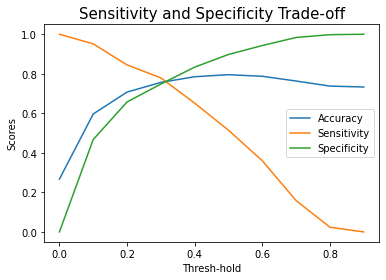

In [302]:
cutoff_df.plot.line(x='Probability', y=['Accuracy','Sensitivity','Specificity'])
plt.xlabel("Thresh-hold")
plt.ylabel("Scores")
plt.title("Sensitivity and Specificity Trade-off",size=15)
plt.show()

In [303]:
y_pred_final['final_predicted'] = y_pred_final.Churn_Prob.map( lambda x: 1 if x > 0.3 else 0)
y_pred_final.head()

,Churn,Churn_Prob,CustID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.020062,1584,0,1,0,0,0,0,0,0,0,0,0,0
1,1,0.323738,1043,0,1,1,1,1,0,0,0,0,0,0,1
2,1,0.422179,1077,0,1,1,1,1,1,0,0,0,0,0,1
3,0,0.321928,2478,0,1,1,1,1,0,0,0,0,0,0,1
4,1,0.463763,6908,0,1,1,1,1,1,0,0,0,0,0,1


In [304]:
confusion2 = confusion_matrix(y_pred_final.Churn, y_pred_final.final_predicted )
confusion2

array([[2699,  909],
       [ 290, 1024]], dtype=int64)

In [305]:
TP = confusion2[1,1] 
TN = confusion2[0,0]
FP = confusion2[0,1]
FN = confusion2[1,0]

In [306]:
#Accuracy of the final model
accuracy = (TN + TP)/float(TN+FN+TP+FP)
print("Accuracy of the model: ",round(accuracy,3))

# Sensitivity of the final model
sensitivity = TP / float(TP+FN)
print("Sensitivity of the model: ",round(sensitivity,3))

# Specificity of the final model
specificity = TN / float(TN+FP)
print("Specificity of the model: ",round(specificity,3))

Accuracy of the model:  0.756
Sensitivity of the model:  0.779
Specificity of the model:  0.748


In [312]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()
    
    return None

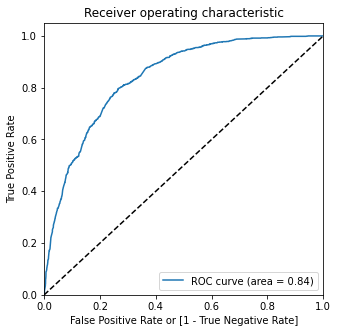

In [313]:
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve( y_pred_final.Churn, y_pred_final.Churn_Prob, drop_intermediate = False )
draw_roc(y_pred_final.Churn, y_pred_final.Churn_Prob)

In [314]:
# Precision of the final model
precision = TP / float(TP+FP)
print("Precision of the model: ",round(precision,3))

# Recall of the final model
recall = TP / float(TP+FN)
print("Recall of the model: ",round(recall,3))

Precision of the model:  0.53
Recall of the model:  0.779


In [316]:
from sklearn.metrics import precision_recall_curve
p, r, thresholds = precision_recall_curve(y_pred_final.Churn, y_pred_final.Churn_Prob)

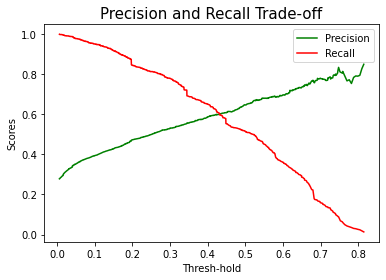

In [317]:
plt.plot(thresholds, p[:-1], "g-",label="Precision")
plt.plot(thresholds, r[:-1], "r-",label="Recall")
plt.xlabel("Thresh-hold")
plt.ylabel("Scores")
plt.title("Precision and Recall Trade-off",size=15)
plt.legend()
plt.show()

In [319]:
x_test[['tenure','MonthlyCharges','TotalCharges']] = sc.transform(x_test[['tenure','MonthlyCharges','TotalCharges']])

In [320]:
x_test = x_test[col]
x_test.head()

,tenure,Contract_One year,Contract_Two year,PaymentMethod_Electronic check,InternetService_Fiber optic,OnlineSecurity_No internet service,OnlineBackup_No internet service,DeviceProtection_No internet service,TechSupport_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes
1778,1.615791,0,1,0,0,1,1,1,1,0,1,0
5036,-0.665855,0,0,0,1,0,0,0,0,0,0,1
1106,1.249098,0,1,0,1,0,0,0,0,1,0,1
1665,-0.951061,0,0,1,1,0,0,0,0,0,0,0
927,-0.788087,0,0,1,1,0,0,0,0,0,0,0


In [321]:
x_test_sm = sm.add_constant(x_test)
y_test_pred = res.predict(x_test_sm)

In [322]:
y_test_pred[:10]

1778    0.003620
5036    0.550036
1106    0.054114
1665    0.617668
927     0.585101
4648    0.672058
6905    0.385818
5198    0.307571
3404    0.064670
407     0.497992
dtype: float64

In [324]:
y_pred_1 = pd.DataFrame(y_test_pred)
y_pred_1.head()

,0
1778,0.003620
5036,0.550036
1106,0.054114
1665,0.617668
927,0.585101


In [325]:
y_test_df = pd.DataFrame(y_test)

In [326]:
y_test_df['CustID'] = y_test_df.index

In [327]:
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [328]:
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)
y_pred_final.head()

,Churn,CustID,0
0,0,1778,0.003620
1,1,5036,0.550036
2,0,1106,0.054114
3,0,1665,0.617668
4,1,927,0.585101


In [329]:
y_pred_final= y_pred_final.rename(columns={ 0 : 'Churn_Prob'})
y_pred_final.head()

,Churn,CustID,Churn_Prob
0,0,1778,0.003620
1,1,5036,0.550036
2,0,1106,0.054114
3,0,1665,0.617668
4,1,927,0.585101


In [330]:
y_pred_final['final_predicted'] = y_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.3 else 0)
y_pred_final.head()

,Churn,CustID,Churn_Prob,final_predicted
0,0,1778,0.003620,0
1,1,5036,0.550036,1
2,0,1106,0.054114,0
3,0,1665,0.617668,1
4,1,927,0.585101,1


In [331]:
confusion2 = confusion_matrix(y_pred_final.Churn, y_pred_final.final_predicted )
confusion2

array([[1161,  394],
       [ 129,  426]], dtype=int64)

In [332]:
TP = confusion2[1,1] 
TN = confusion2[0,0]
FP = confusion2[0,1]
FN = confusion2[1,0]

In [333]:
accuracy = (TN + TP)/float(TN+FN+TP+FP)
print("Accuracy of the model: ",round(accuracy,3))
sensitivity = TP / float(TP+FN)
print("Sensitivity of the model: ",round(sensitivity,3))
specificity = TN / float(TN+FP)
print("Specificity of the model: ",round(specificity,3))

Accuracy of the model:  0.752
Sensitivity of the model:  0.768
Specificity of the model:  0.747


In [335]:
model  = pd.DataFrame({"Features": x_train_sm.columns,"Coefficient":res.params.values})
model["Odds_Ratio"] = model["Coefficient"].apply(lambda x: np.exp(x))
model[["Coefficient","Odds_Ratio"]] = model[["Coefficient","Odds_Ratio"]].apply(lambda x: round(x,2))
model["Perc_Impact"] = model["Odds_Ratio"].apply(lambda x: (x-1)*100)
model

,Features,Coefficient,Odds_Ratio,Perc_Impact
0,const,-1.71,0.18,-82.0
1,tenure,-0.83,0.43,-57.0
2,Contract_One year,-0.87,0.42,-58.0
3,Contract_Two year,-1.80,0.17,-83.0
4,PaymentMethod_Electronic check,0.43,1.54,54.0
5,InternetService_Fiber optic,0.96,2.61,161.0
6,OnlineSecurity_No internet service,-0.15,0.86,-14.0
7,OnlineBackup_No internet service,-0.15,0.86,-14.0
8,DeviceProtection_No internet service,-0.15,0.86,-14.0
9,TechSupport_No internet service,-0.15,0.86,-14.0


In [336]:
from sklearn.decomposition import PCA

In [337]:
pca=PCA(svd_solver='randomized',random_state=42)

In [338]:
pca.fit(x_train)

PCA(random_state=42, svd_solver='randomized')

In [339]:
pca.components_

array([[ 3.39131564e-01,  1.27678917e-02,  8.64912524e-02,
         5.00977534e-01,  4.92787437e-01, -1.24291257e-03,
         3.90018153e-02,  6.75858780e-02, -5.74929561e-03,
         2.18047170e-02,  3.94575751e-02,  3.26594993e-02,
         3.42848573e-02, -9.95821385e-02,  1.57337052e-01,
        -1.62840993e-01, -1.27678917e-02,  1.40783879e-01,
        -1.62840993e-01,  1.10699210e-01, -1.62840993e-01,
         1.48318622e-01, -1.62840993e-01,  1.56442289e-01,
        -1.62840993e-01,  1.20317138e-01, -1.62840993e-01,
         1.73528253e-01, -1.62840993e-01,  1.71871662e-01],
       [ 6.10229930e-01,  9.81123684e-03, -1.11033260e-01,
        -2.77960170e-01,  3.33168331e-01,  8.10010591e-03,
        -5.39130778e-02,  1.47984269e-01,  1.14717346e-01,
         6.26755209e-02,  2.20839018e-01,  8.01610215e-02,
        -1.76308820e-01,  3.20014773e-02, -1.62089925e-01,
         1.93921869e-01, -9.81123684e-03,  3.33441405e-02,
         1.93921869e-01,  4.75962425e-02,  1.93921869e-

In [340]:
colnames=list(x_train.columns)
pca_df=pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1],'Feature':colnames})

In [341]:
pca_df.head()

,PC1,PC2,Feature
0,0.339132,0.610230,tenure
1,0.012768,0.009811,PhoneService
2,0.086491,-0.111033,PaperlessBilling
3,0.500978,-0.277960,MonthlyCharges
4,0.492787,0.333168,TotalCharges


In [342]:
pca.explained_variance_ratio_

array([3.94024593e-01, 1.85185320e-01, 6.06866509e-02, 3.50630694e-02,
       3.37196768e-02, 3.05676920e-02, 2.84423816e-02, 2.60554603e-02,
       2.47785395e-02, 2.27308138e-02, 1.92638779e-02, 1.88980986e-02,
       1.76164729e-02, 1.66209590e-02, 1.59605948e-02, 1.53494048e-02,
       1.34623209e-02, 1.19717536e-02, 1.04702080e-02, 7.62378908e-03,
       6.30000957e-03, 5.14852542e-03, 5.97873850e-05, 1.59213926e-33,
       1.59213926e-33, 1.59213926e-33, 1.59213926e-33, 1.59213926e-33,
       1.59213926e-33, 1.59213926e-33])

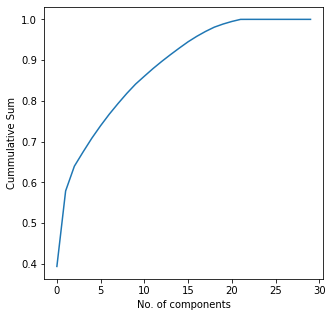

In [348]:
plt.figure(figsize=(5,5))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('No. of components')
plt.ylabel('Cummulative Sum')
plt.show()

In [358]:
pca_last=PCA(n_components=3)
df_train_pca3=pca_last.fit_transform(x_train)

In [351]:
learner_pca3=LogisticRegression()
model_pca3=learner_pca3.fit(df_train_pca3,y_train)

In [356]:
pca_test_pca3=PCA(n_components=3)
df_train_pca3=pca_test_pca3.fit_transform(x_test)

In [357]:
learner_pca3=LogisticRegression()
model_pca3=learner_pca3.fit(df_train_pca3,y_train)
pred_prob_test3=model_pca3.predict_proba(df_test_pca3) [:,1]

ValueError: Found input variables with inconsistent numbers of samples: [2110, 4922]

In [ ]:
y_pred=model_pca3.predict(x_test)

In [ ]:
print('accuracy:',accuracy_score(y_test,y_pred))

In [ ]:
fpr, tpr, thresholds = metrics.roc_curve()

We have completed all steps for solving a classification problem. We have seen that the model we built gives good accuracy score of 77% on the Training dataset and 74% on the Testing dataset along with other metrics. For this problem we preffered to use Sensitivity and Specificity metrics for the evauation. We have also seen impact of each variable on the probability of churn. Below are few observations about the model:

A customer with long term contracts like One year and Two Year are less likely to churn than the customer having Monthly contract.

A customer who is associated with the company from longer time is less likely to churn than a customer who is associated from few months. Reason can be the customer is happy with the services and wishes to continue with them.

Customer using Internet Services, Fiber Optics, Streaming TV and Movies servies are more likely to churn than customer who are not using these services. Reason can be company not providing good Internet services and need to work on that.

Customer who have opted for Payment Method through Credit Card or Mailed check are less likely to churn then other customers.

Overall, company need to provide better internet services and other services associated with internet to retain their customers.